data.json 数据描述
1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：

节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
边：["Yanyan-Wang", "Aarebecca", 25.3]["Yanyan-Wang", "pomelo-nwu", 25.09], ...

1. 社交网络构建与分析
a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

In [39]:
import json
import numpy as np

with open('D:\\pycode\\hw4_data.json', 'r') as f:
    data = json.load(f)

nodes = {node[0]: node[1] for node in data['nodes']}
edges = [(edge[0], edge[1], edge[2]) for edge in data['edges']]

node_list = list(nodes.keys())
node_index = {node: idx for idx, node in enumerate(node_list)}

num_nodes = len(node_list)
adj_matrix = np.zeros((num_nodes, num_nodes))

adjacency_dict = {user: [] for user in node_list}

for user1, user2, weight in edges:
    idx1 = node_index[user1]
    idx2 = node_index[user2]
    adj_matrix[idx1, idx2] = weight
    adj_matrix[idx2, idx1] = weight
    adjacency_dict[user1].append((user2, weight))
    adjacency_dict[user2].append((user1, weight))

print("邻接矩阵:")
print(adj_matrix)

print("\n")
print("字典:")
print(adjacency_dict)

direct_friends = {user: [friend for friend, _ in friends] for user, friends in adjacency_dict.items()}
print("\n")
print("每个用户的直接朋友:")
for user, friends in direct_friends.items():
    print(f"{user}: {friends}")

邻接矩阵:
[[ 0.   25.3  25.09  9.62  2.1   0.    0.    0.    0.    1.14  0.    0.
   0.86 11.85  7.25  2.34  0.    0.    0.    0.    0.    0.    4.25  4.5
   0.    0.    3.11  7.39  3.61  0.    0.  ]
 [25.3   0.   24.84  6.4   0.97  0.    0.    0.    0.    0.    0.    0.
   0.   11.92  6.58  0.    0.    0.    0.    0.    0.    0.    4.55  4.84
   0.    0.    3.27  7.73  3.82  0.    0.  ]
 [25.09 24.84  0.   12.48  3.96  3.27  2.52  2.1   0.    3.56  1.5   0.
   4.11 13.85  8.1   3.86  2.36  0.    1.33  1.09  2.24  0.    4.66  4.97
   0.    0.    3.32  7.63  3.9   1.    2.1 ]
 [ 9.62  6.4  12.48  0.   11.87  9.15  7.73  6.96  6.85 15.28  7.93  6.54
   9.84  7.15  4.1  10.64  7.32  2.32  5.19  7.84  5.09  3.51  3.21  3.35
   4.19  3.05  2.51  3.87  2.83  2.84  2.96]
 [ 2.1   0.97  3.96 11.87  0.    7.62  5.33  8.44  6.84  6.29  9.52  1.51
   6.4   1.77  0.89  5.48  7.29  1.2   6.71  5.92  2.84  1.26  0.84  0.85
   1.34  1.2   0.78  0.88  0.81  1.09  0.89]
 [ 0.    0.    3.27  9.15  7.62  0. 

2. 统计与度中心性分析
a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

In [40]:
degrees = {user: len(friends) for user, friends in direct_friends.items()}
sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)

top_5_degrees = sorted_degrees[:5]
print("度数最多的前5个用户及其朋友数量:")
for user, degree in top_5_degrees:
    print(f"{user}: {degree}")

sorted_influence = sorted(nodes.items(), key=lambda x: x[1], reverse=True)

top_5_influence = sorted_influence[:5]
print("影响力最高的前5个用户:")
for user, influence in top_5_influence:
    print(f"{user}: {influence}")
    

combined_influence = {user: (influence * 0.5 + degrees.get(user, 0) * 0.5) for user, influence in nodes.items()}

sorted_combined_influence = sorted(combined_influence.items(), key=lambda x: x[1], reverse=True)

top_5_combined_influence = sorted_combined_influence[:5]
print("综合影响力最高的前5个用户:")
for user, combined_influence in top_5_combined_influence:
    print(f"{user}: {combined_influence}")

度数最多的前5个用户及其朋友数量:
tyn1998: 30
frank-zsy: 30
pomelo-nwu: 24
andyhuang18: 23
wj23027: 23
影响力最高的前5个用户:
Yanyan-Wang: 50.95
Aarebecca: 23.82
pomelo-nwu: 22.36
tyn1998: 16.64
frank-zsy: 15.8
综合影响力最高的前5个用户:
Yanyan-Wang: 32.475
tyn1998: 23.32
pomelo-nwu: 23.18
frank-zsy: 22.9
Aarebecca: 17.41


3. 推荐新朋友
a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。

In [41]:
import json  
import numpy as np  

with open('D:\\pycode\\hw4_data.json', 'r') as f:  
    data = json.load(f)  
edges = [(edge[0], edge[1], edge[2]) for edge in data['edges']]
node_list = list(nodes.keys())  
node_index = {node: idx for idx, node in enumerate(node_list)}  

adjacency_dict = {user: [] for user in node_list}  
for user1, user2, weight in edges:  
    adjacency_dict[user1].append((user2, weight))  
    adjacency_dict[user2].append((user1, weight))  

def find_common_friends(user, adjacency_dict):  
    direct_friends = set(friend for friend, _ in adjacency_dict[user])  
    common_friends = {}  
    for friend in direct_friends:  
        for fof, _ in adjacency_dict[friend]:  # fof==friend of friend  
            if fof != user and fof not in direct_friends:  
                if fof in common_friends:  
                    common_friends[fof] += 1  
                else:  
                    common_friends[fof] = 1  
    return common_friends  
  
common_friends_wang = find_common_friends("Yanyan-Wang", adjacency_dict)  
sorted_common_friends = sorted(common_friends_wang.items(), key=lambda x: x[1], reverse=True)  
top_5_common_friends = sorted_common_friends[:5]  
print("Yanyan-Wang的朋友的朋友中最有可能成为新朋友的用户:")  
for user, common_count in top_5_common_friends:  
    print(f"{user}: {common_count}个共同朋友")  
  
connections_yanyan = sorted(adjacency_dict["Yanyan-Wang"], key=lambda x: x[1], reverse=True)  
top_5_connections = connections_yanyan[:5]  
print("与Yanyan-Wang连接强度最高的5个用户:")  
for friend, weight in top_5_connections:  
    print(f"{friend}: {weight}")

Yanyan-Wang的朋友的朋友中最有可能成为新朋友的用户:
will-ww: 6个共同朋友
PureNatural: 6个共同朋友
xgdyp: 6个共同朋友
xiaoya-yaya: 6个共同朋友
zhicheng-ning: 6个共同朋友
与Yanyan-Wang连接强度最高的5个用户:
Aarebecca: 25.3
pomelo-nwu: 25.09
yangzy0603: 11.85
tyn1998: 9.62
yvonneyx: 7.39


4. 网络图的可视化
a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

浅色的那几个影响力得分比较高，像tyn1998、frank-zsy,节点越大，度数也越高

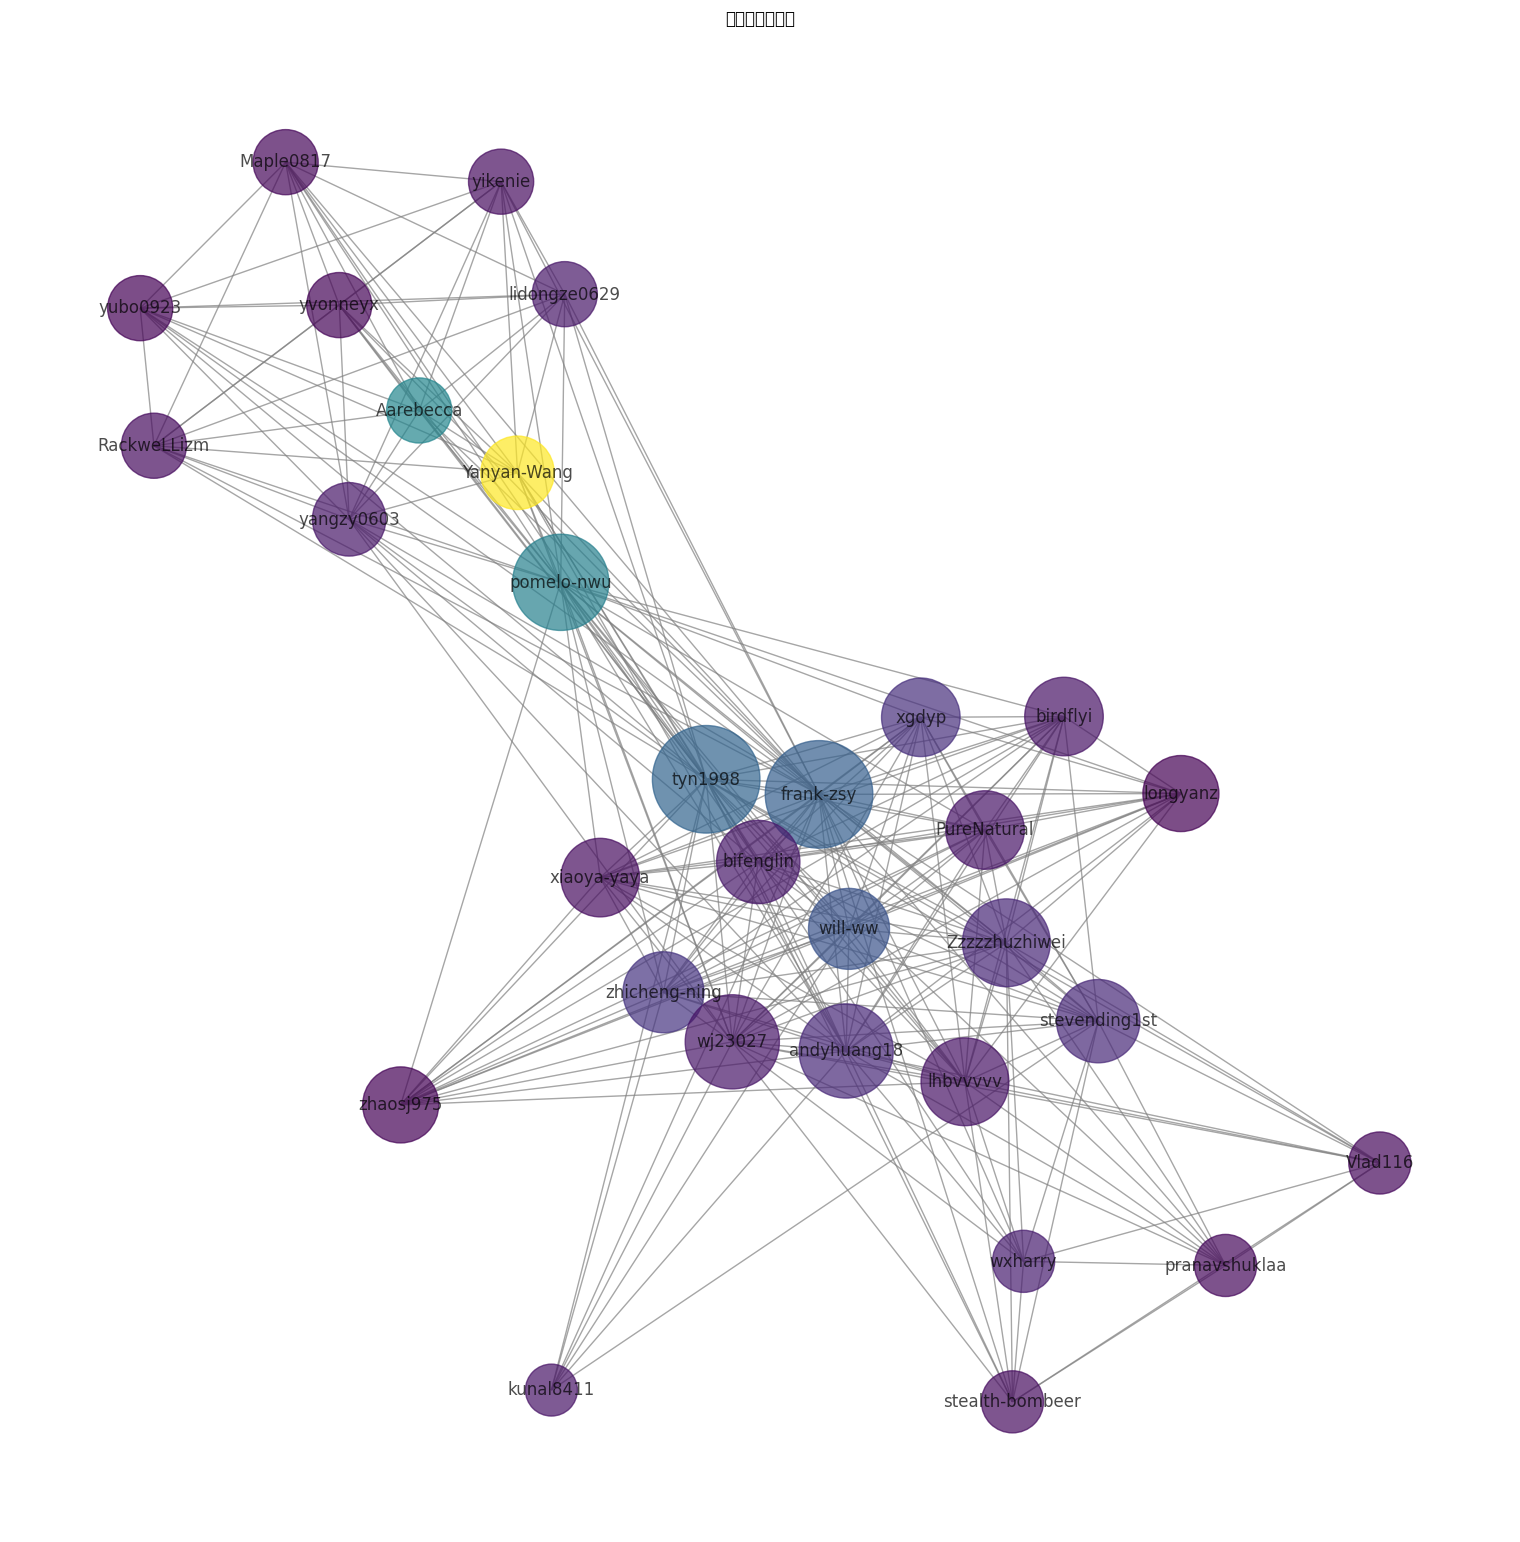

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建图
G = nx.Graph()

# 添加节点
for user, influence in nodes.items():
    G.add_node(user, influence=influence, degree=degrees[user])

# 添加边
for user1, user2, weight in edges:
    G.add_edge(user1, user2, weight=weight)

# 设置节点颜色和大小
node_colors = [G.nodes[node]['influence'] for node in G.nodes()]
node_sizes = [G.nodes[node]['degree'] * 200 for node in G.nodes()]

# 绘制图
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, cmap=plt.cm.viridis, edge_color='gray', alpha=0.7)
plt.title("用户关系网络图")
plt.show()